[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alok8663/Machine_Learning/blob/main/ML_Projects1/Fake_News_Classification.ipynb.ipynb)

In [26]:
#Importing Libraries
import numpy as np
import pandas as pd

In [27]:
#Loading the datasets
fake = pd.read_csv("/content/Fake.csv")
true = pd.read_csv("/content/True.csv")

In [28]:
#Creating a category for whether fake or not
#Where 1 stands for fake news and 0 stands for true news

fake["category"]=1
true["category"]=0

In [29]:
#Joining the datasets
df=pd.concat([fake,true]).reset_index(drop=True)

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

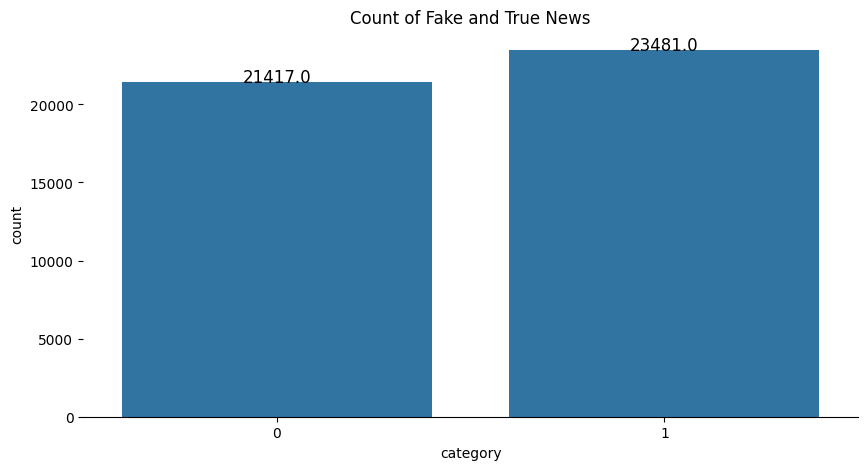

In [31]:
#Creating a count plot for category column
fig = plt.figure(figsize=(10,5))

graph = sns.countplot(x="category", data=df)
plt.title("Count of Fake and True News")

#Removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#Annotating bars with the counts
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)

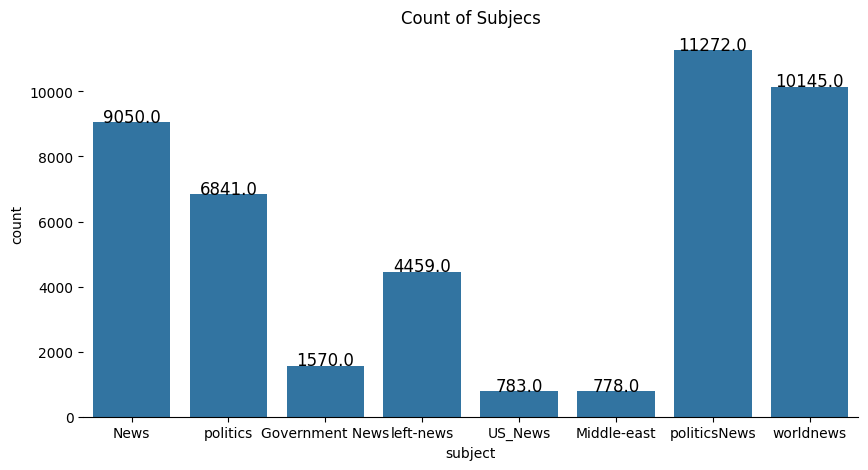

In [32]:
#Creating a count plot for subject column
fig = plt.figure(figsize=(10,5))

graph = sns.countplot(x="subject", data=df)
plt.title("Count of Subjecs")

#Removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#Annotating bars with the counts
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)

# Data Cleaning

In [33]:
#Checking the missing values in each columns
df.isna().sum()*100/len(df)

,0
title,0.0
text,0.0
subject,0.0
date,0.0
category,0.0


In [34]:
blanks = []

# Iterate through the index and text of the 'text' column
for index, text in df["text"].items():
    if isinstance(text, str) and text.isspace():  # Check if it's a string and contains only spaces
        blanks.append(index)  # Add the index to the list

print(f"Number of blanks: {len(blanks)}")


Number of blanks: 631


In [35]:
print(df.columns)

Index(['title', 'text', 'subject', 'date', 'category'], dtype='object')


In [36]:
df.columns = df.columns.str.strip()

In [37]:
print(df.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  category  
0  December 31, 2017         1  
1  December 31, 2017         1  
2  December 30, 2017         1  
3  December 29, 2017         1  
4  December 25, 2017         1  


In [38]:
df.rename(columns={"Title": "title", "Text": "text"}, inplace=True)

In [39]:
if "title" not in df.columns:
    df["title"] = ""  # Placeholder for missing column

In [40]:
# Check and merge 'title' and 'text'
if "title" in df.columns and "text" in df.columns:
    df["text"] = df["title"] + " " + df["text"]
else:
    print("Error: Columns 'title' or 'text' are missing.")

# Ensure 'category' column exists
if "category" in df.columns:
    df = df[["text", "category"]]
else:
    print("Error: Column 'category' is missing.")

In [41]:
#Importing libraries for cleaning puprose

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re

In [42]:
#loading spacy library
nlp=spacy.load("en_core_web_sm")

#creating instance
lemma=WordNetLemmatizer()

In [43]:
import spacy
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords
nltk.download('stopwords')

# Stopwords from spaCy
nlp = spacy.load('en_core_web_sm')
list1 = nlp.Defaults.stop_words
print(f"Number of spaCy stopwords: {len(list1)}")

# Stopwords from NLTK
list2 = stopwords.words('english')
print(f"Number of NLTK stopwords: {len(list2)}")

# Combine the stopword lists
Stopwords = set(list1).union(set(list2))
print(f"Total combined stopwords: {len(Stopwords)}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Number of spaCy stopwords: 326
Number of NLTK stopwords: 179
Total combined stopwords: 382


In [44]:
#text cleaning function
def clean_text(text):

    """
    It takes text as an input and clean it by applying several methods

    """

    string = ""

    #lower casing
    text=text.lower()

    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)

    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)

    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "

    return string


In [45]:
import nltk

# Download required NLTK resources
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional: Ensures proper language support for WordNet

# Assuming clean_text is already defined
df["text"] = df["text"].apply(clean_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Word Cloud



In [46]:
from wordcloud import WordCloud

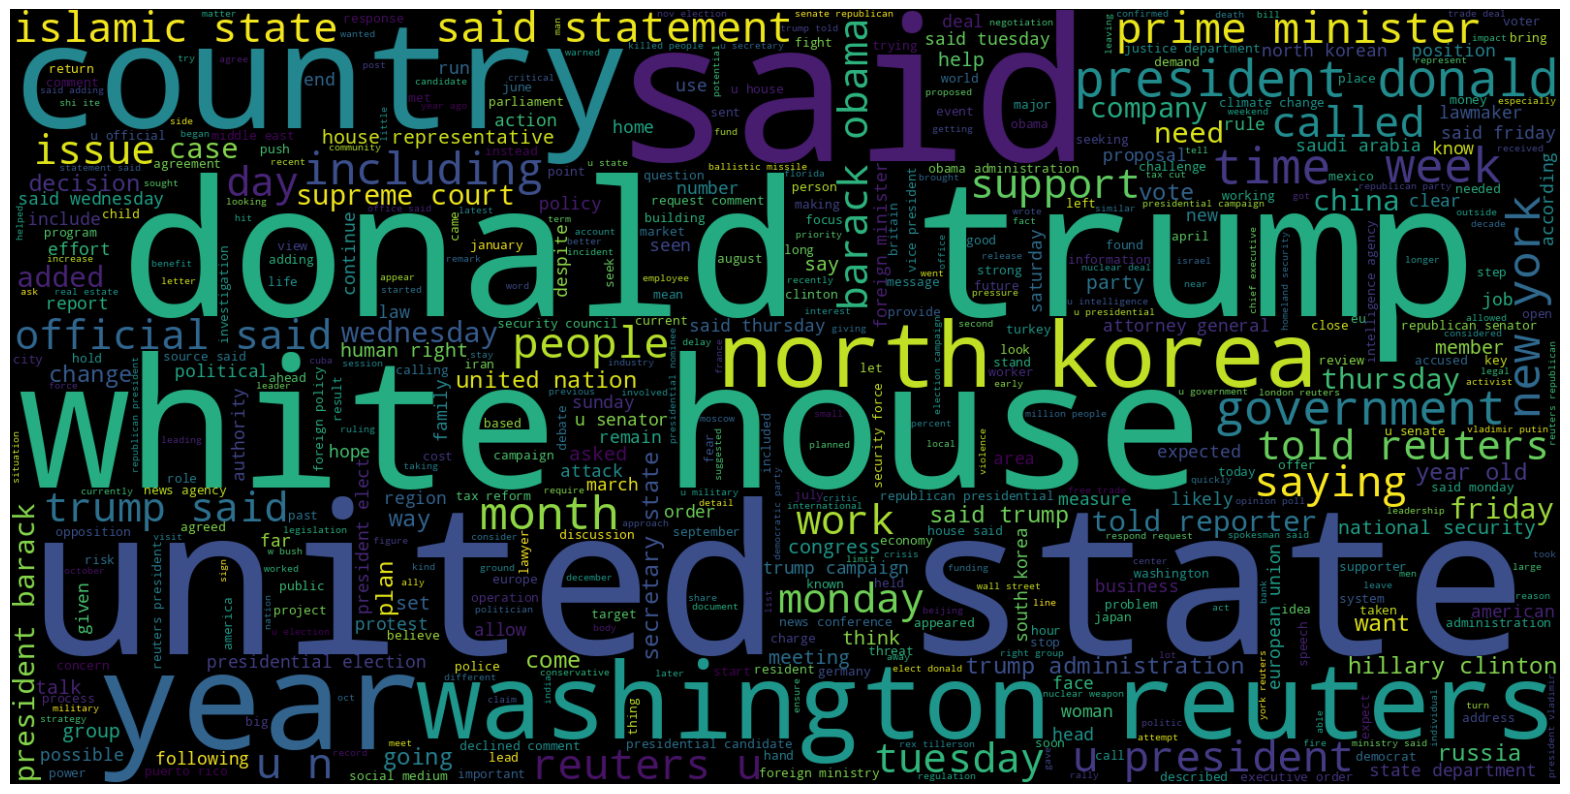

In [47]:
#True News
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [48]:
#Creating more intiuive wordcloud

#pil is pillow and used for image manupulation
from PIL import Image


In [49]:
#Creating a mask of thumb
thumb="thumbsup.png"
icon=Image.open(thumb)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)


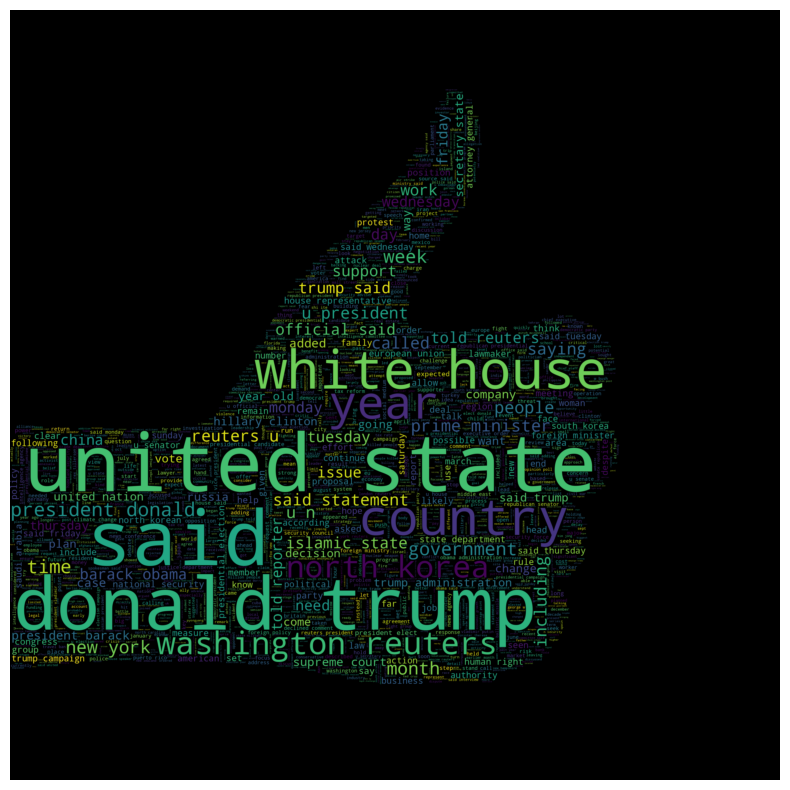

In [50]:
#True News
plt.figure(figsize = (10,10))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [51]:
#creating word cloud using skull image for fake news which depict that
#fake news are dangerous

skull="skull.png"
icon=Image.open(skull)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

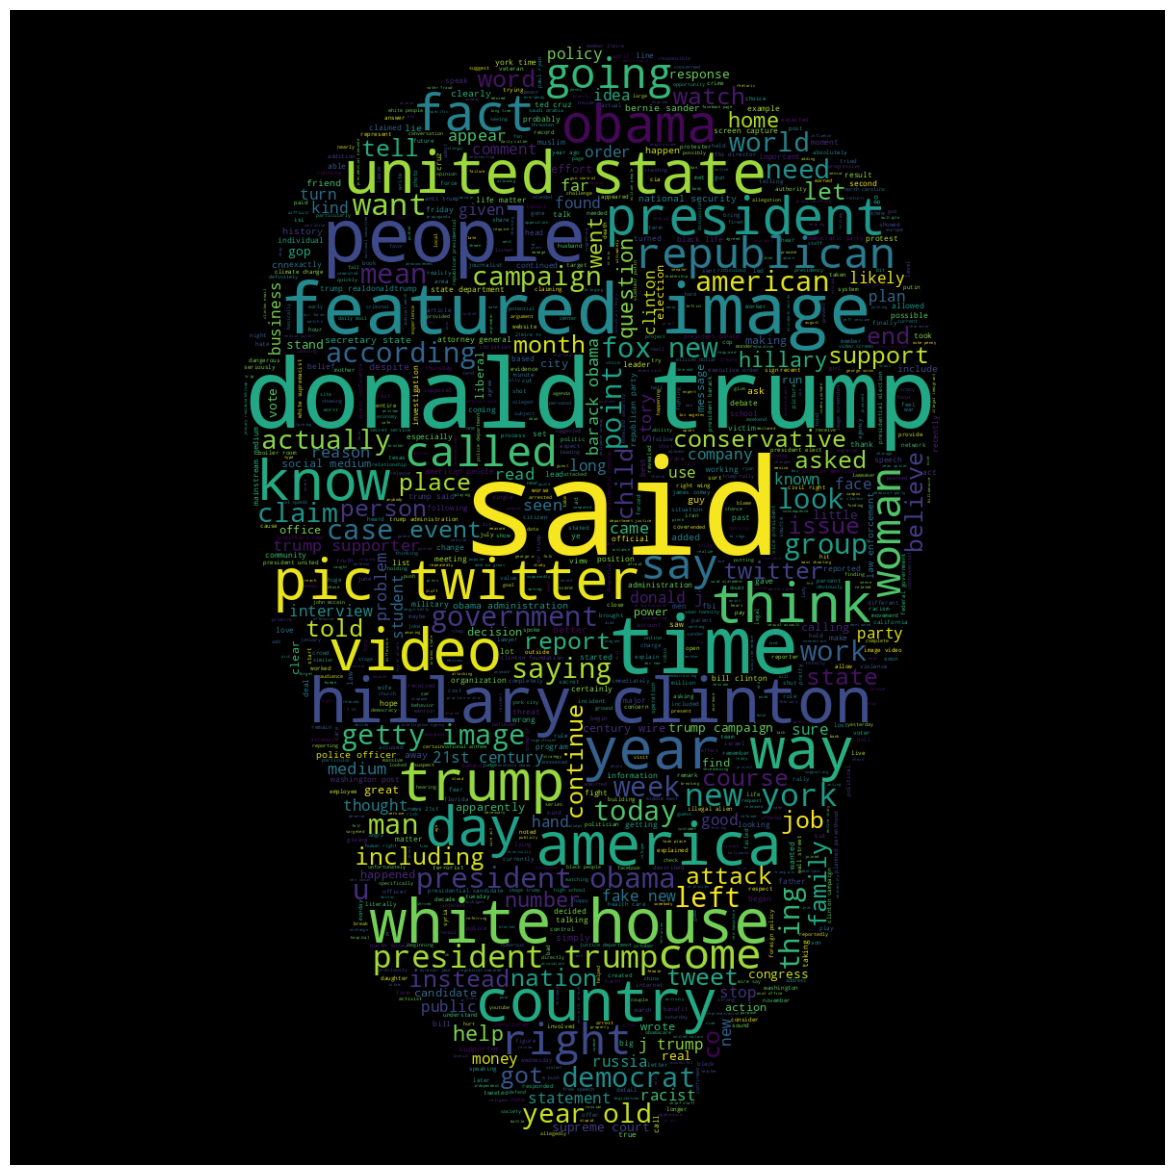

In [52]:
#Fake News
plt.figure(figsize = (15,15))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.category == 1].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

#  Feature-Extraction & Model building


In [53]:
#splitting the
from sklearn.model_selection import train_test_split


X=df["text"] #feature
y=df["category"] # traget

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
#importing libraries to build a pipline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC


In [55]:
#this pipe line will take the text and vectorise it , and then TF-IDF, then fitting the model

text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [56]:
#making prediction using the model
predictions=text_clf.predict(X_test)

In [57]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7039
           1       0.99      0.99      0.99      7778

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



In [58]:
#overall acuracy
print(metrics.accuracy_score(y_test,predictions))

0.9937909158399136


In [59]:
#confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[6994   45]
 [  47 7731]]
